### import dependency

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
# from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings

# Disable all warnings (not recommended unless you're sure)
warnings.filterwarnings("ignore")

## 1. Data Preprocessing

### Load the provided dataset and perform initial data exploration

In [15]:
# Read the Excel file into a DataFrame
data = pd.read_excel("customer_churn_large_dataset.xlsx")

# display 5 reocrd
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [16]:
# inforamtion about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [17]:
# desribe numberic column 
data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [18]:
# give description to target variable for analysis
ch = {1: 'Customer left', 0: 'Customer stayed'}
data['Churn_Desc'] = data['Churn'].map(ch)

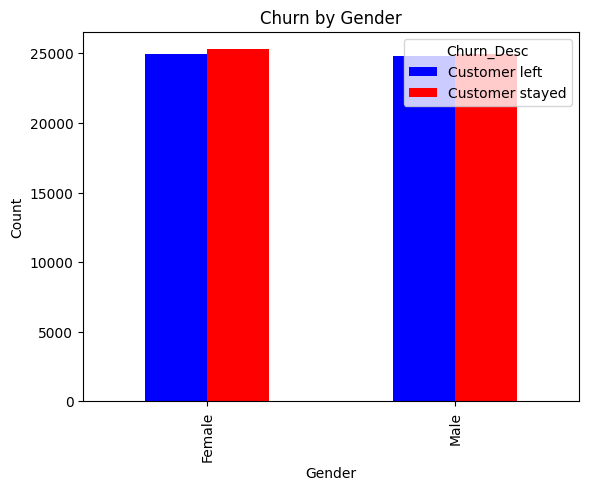

In [19]:
# Group the data by 'Gender' and 'Churn' and count the number of occurrences
gender_churn_count = data.groupby(['Gender', 'Churn_Desc']).size().unstack()

# Create a bar plot
gender_churn_count.plot(kind='bar', stacked=False, color=['blue', 'red'])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn by Gender')

# Show the plot
plt.show()


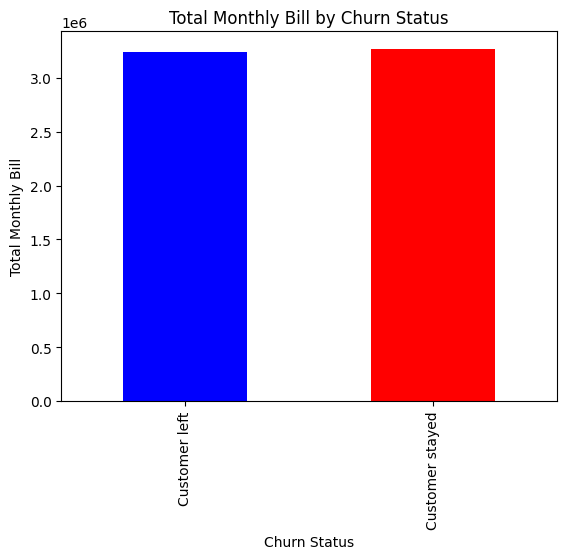

In [20]:
# Group the data by 'Churn' and calculate the sum of 'Monthly_Bill' for each group
churn_bill_sum = data.groupby('Churn_Desc')['Monthly_Bill'].sum()

# Create a bar plot
churn_bill_sum.plot(kind='bar', color=['blue', 'red'])

# Add labels and title
plt.xlabel('Churn Status')
plt.ylabel('Total Monthly Bill')
plt.title('Total Monthly Bill by Churn Status')


# Show the plot
plt.show()

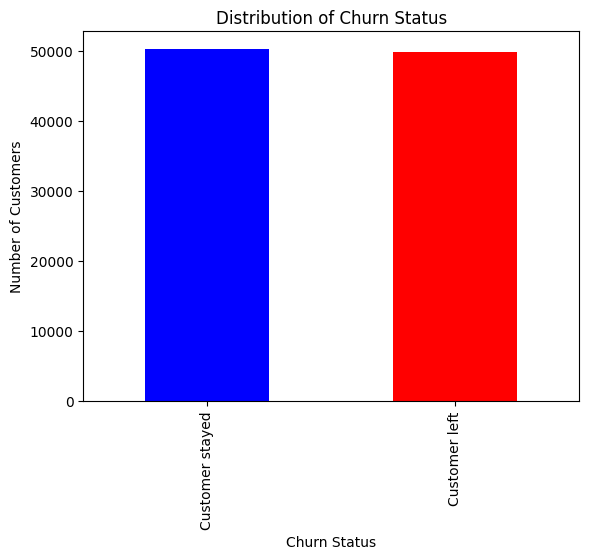

In [21]:
# Count the number of customers in each class (Stayed and Left)
churn_counts = data['Churn_Desc'].value_counts()

# Create a bar plot to visualize the class distribution
churn_counts.plot(kind='bar', color=['blue', 'red'])

# Add labels and title
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.title('Distribution of Churn Status')

# Show the plot
plt.show()

In [22]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

In [23]:
data_left = data[data['Churn'] == 0]
data_not_left = data[data['Churn'] == 0]

In [24]:
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Churn_Desc
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,Customer stayed
1,2,Customer_2,62,Female,New York,1,48.76,172,0,Customer stayed
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,Customer stayed
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,Customer left
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,Customer stayed


#### Intorducing new features age group and total amount spend

In [25]:
def getAgeBucket(age: int):
    if age > 0 and age < 18:
        return "child"
    elif age >= 18 and age < 25:
        return "young"
    elif age >=25 and age < 40:
        return "mid age"
    elif age >=40 and age <= 50:
        return "small old"
    else:
        return "old"

In [26]:
# age bucket
data['Age_desc'] = data['Age'].apply(getAgeBucket)

# total amount spend
data['total_amount_spend'] = data['Subscription_Length_Months'] * data['Monthly_Bill']

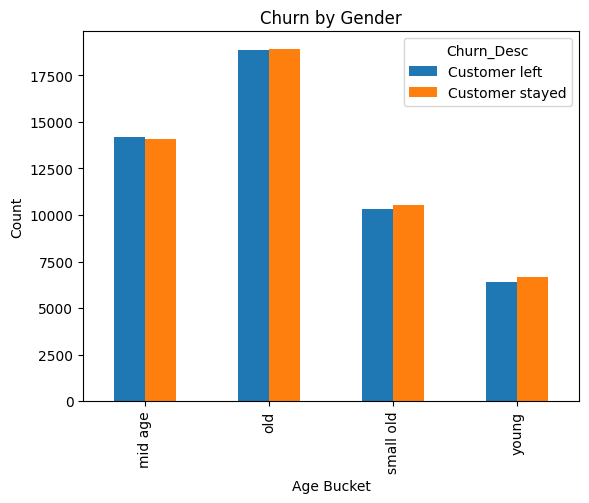

In [36]:
# Group the data by 'Gender' and 'Churn' and count the number of occurrences
gender_churn_count = data.groupby(['Age_desc', 'Churn_Desc']).size().unstack()

# Create a bar plot
gender_churn_count.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Age Bucket')
plt.ylabel('Count')
plt.title('Churn by Gender')

# Show the plot
plt.show()


In [37]:
df = data.copy()

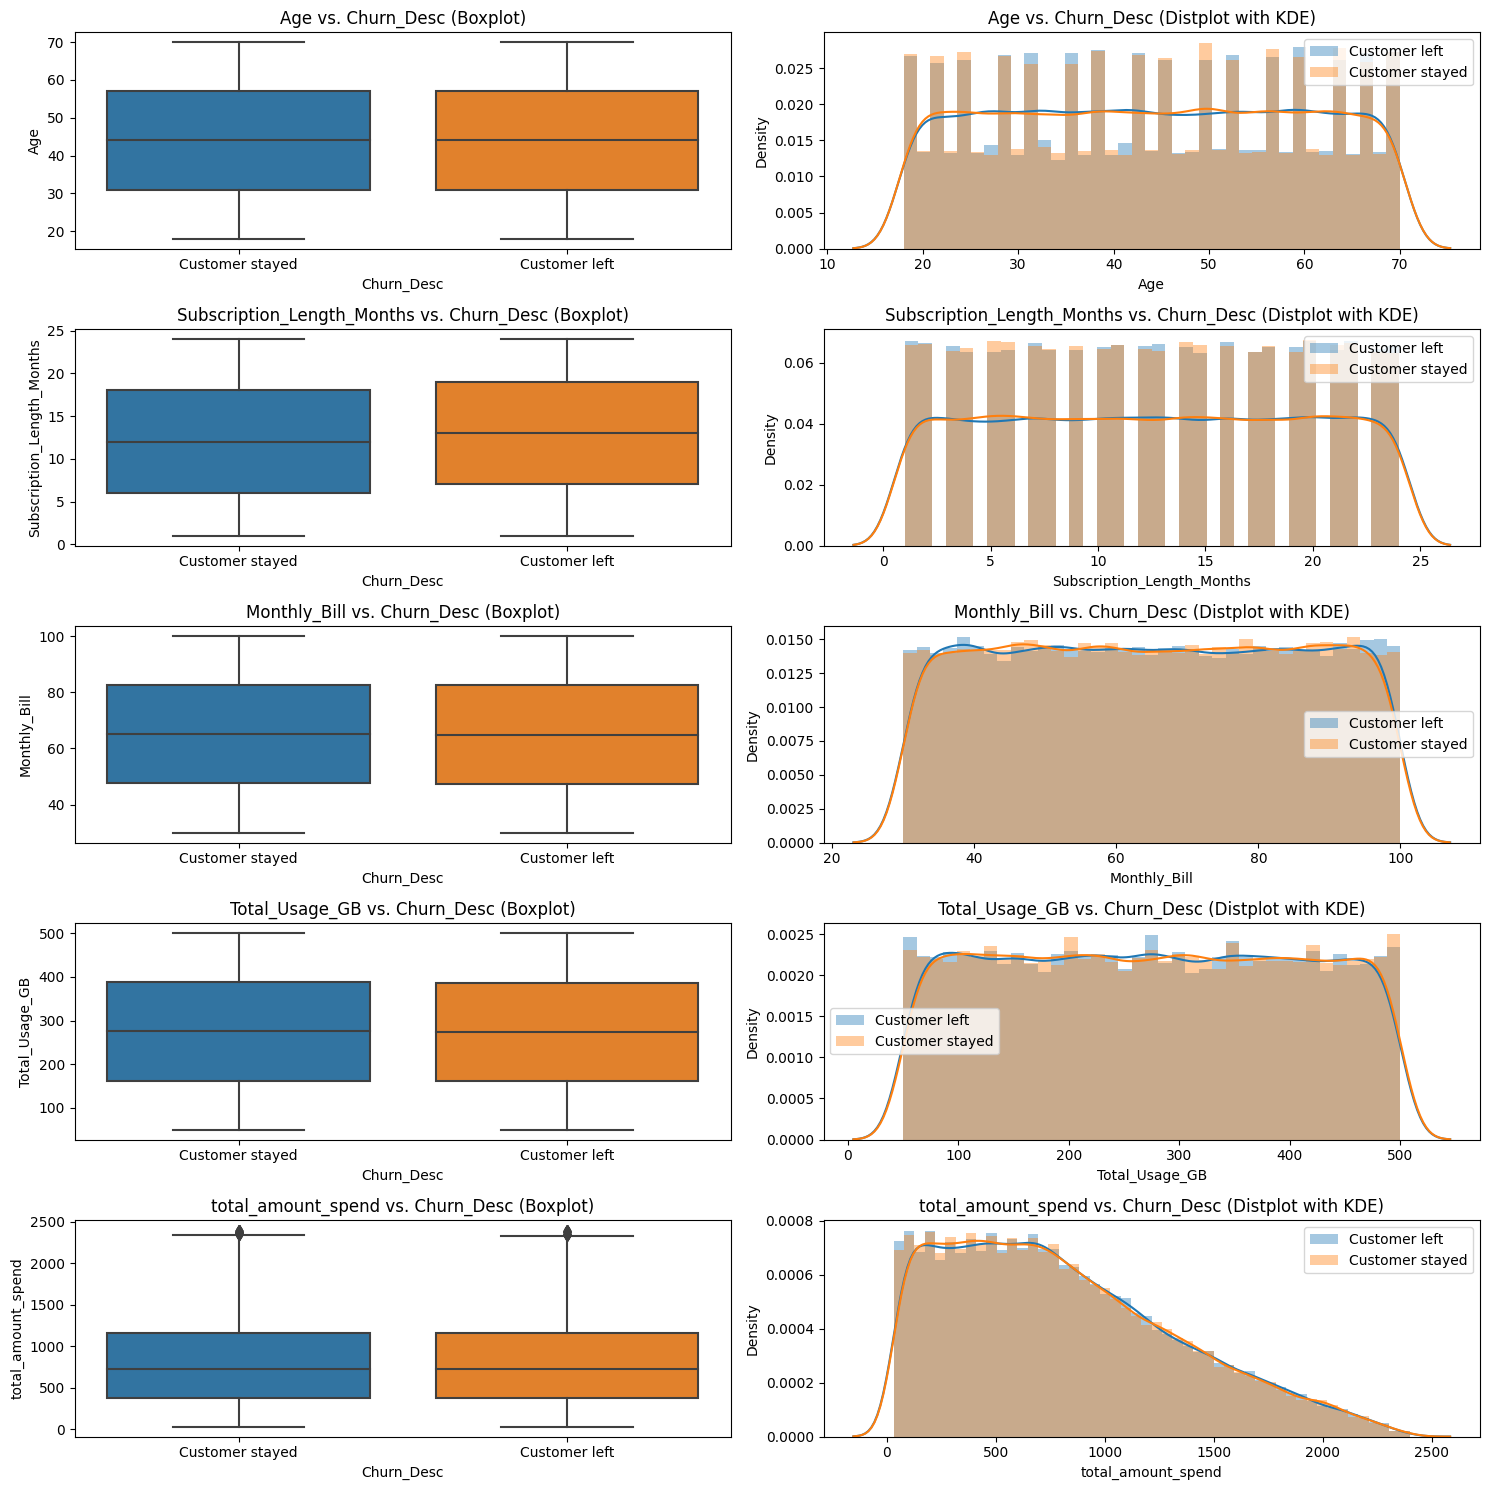

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to compare
features = ["Age", "Subscription_Length_Months", "Monthly_Bill", "Total_Usage_GB","total_amount_spend"]

# Create a single plot with subplots
fig, axes = plt.subplots(len(features), 2, figsize=(15, 15))

# Loop through each feature and create boxplots and dist plots
for i, feature in enumerate(features):
    # Create boxplots
    sns.boxplot(x='Churn_Desc', y=feature, data=df, ax=axes[i, 0])
    axes[i, 0].set_title(f'{feature} vs. Churn_Desc (Boxplot)')

    # Create dist plots with KDE
    sns.distplot(df[df['Churn_Desc'] == 'Customer left'][feature], label='Customer left', ax=axes[i, 1])
    sns.distplot(df[df['Churn_Desc'] == 'Customer stayed'][feature], label='Customer stayed', ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} vs. Churn_Desc (Distplot with KDE)')
    axes[i, 1].legend()

plt.tight_layout()
plt.show()


### Handle missing data and outliers.

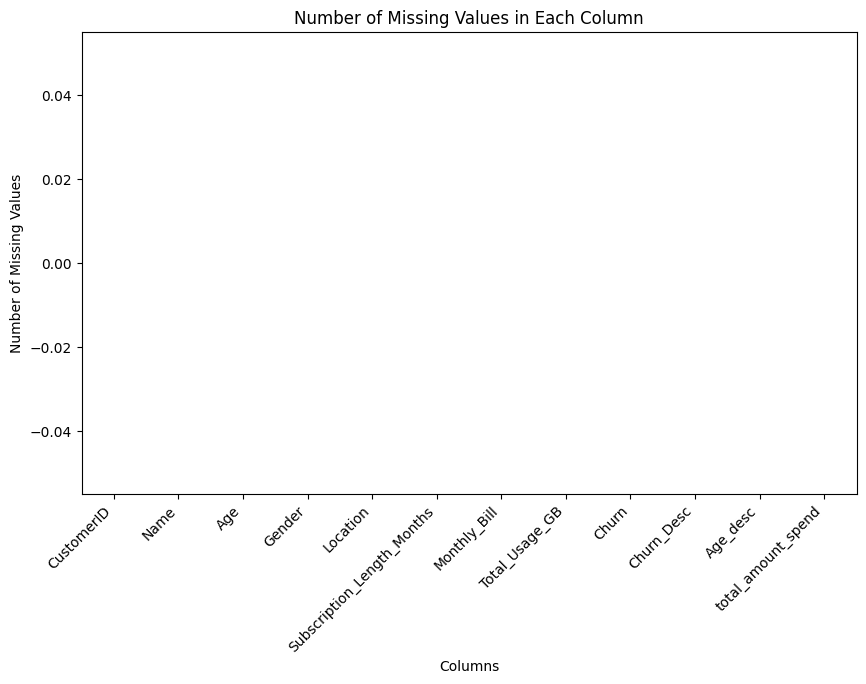

In [38]:
# Check for missing values
missing_values = data.isnull().sum()

# Plot the number of missing values in each column
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.title("Number of Missing Values in Each Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.show()

ValueError: num must be an integer with 1 <= num <= 6, not 7

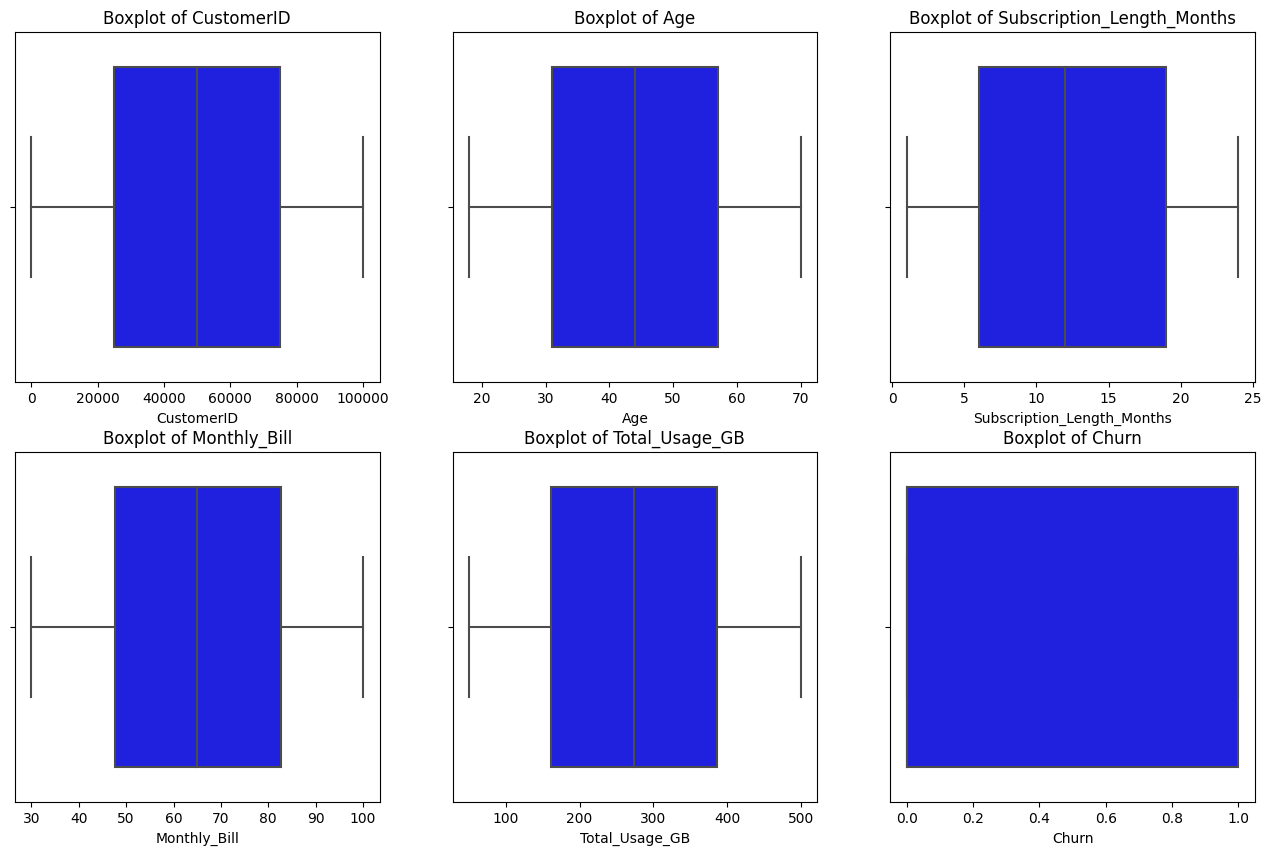

In [39]:
# Get the list of numeric column names
numeric_columns = data.select_dtypes(include='number').columns

# Create subplots for each numeric column
plt.figure(figsize=(16, 10))

for i, col in enumerate(numeric_columns):
    plt.subplot(2, len(numeric_columns)//2, i+1)  # Create a subplot
    sns.boxplot(x=data[col], color='blue')  # Create a boxplot
    plt.xlabel(col)  # Set the x-axis label as the column name
    plt.title(f'Boxplot of {col}')  # Set the title as the column name

plt.tight_layout()  # Ensure plots do not overlap
plt.show()

In [ ]:
data.groupby('Churn_Desc')['Location'].value_counts()

### Prepare the data for machine learning by encoding categorical variables and splitting it into training and testing sets.

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming you have a DataFrame named 'data' with 'Gender' and 'Location' columns

# Create a copy of the original data
data_encoded = data.copy()

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # Set drop='first' to drop one dummy column

# Encode the 'Gender' and 'Location' columns
encoded_columns = encoder.fit_transform(data_encoded[['Gender', 'Location']])

# Get the column names for the one-hot encoded features
column_names = encoder.get_feature_names_out(input_features=['Gender', 'Location'])

# Create a DataFrame from the encoded values with appropriate column names
encoded_df = pd.DataFrame(encoded_columns, columns=column_names)

# Drop the original 'Gender' and 'Location' columns from the DataFrame
data_encoded.drop(['Gender', 'Location'], axis=1, inplace=True)

# Concatenate the one-hot encoded DataFrame to the original DataFrame
data_encoded = pd.concat([data_encoded, encoded_df], axis=1)

# Now, 'Gender' and 'Location' are transformed into one-hot vectors in 'data_encoded'


In [ ]:
data_encoded

In [ ]:
new_data = pd.DataFrame({'Gender': ['Male'], 'Location': ['Los Angeles']})

In [ ]:
# Transform the new arrival data using the same encoder
encoded_values = encoder.transform(new_data[['Gender', 'Location']])

In [ ]:
data_encoded.drop(['CustomerID','Name','Churn_Desc'], axis=1, inplace=True)

In [ ]:
data_encoded

In [ ]:
# splitting data into train and test
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame and 'target_column' is the name of your target variable
X = data_encoded.drop('Churn', axis=1)  # Drop the target variable to get the input features
y = data_encoded['Churn']  # Select only the target variable

In [ ]:
# Split the dataset into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape, X_test.shape

## 2. Feature Engineering

### Generate relevant features from the dataset that can help improve the model's prediction accuracy.
### Apply feature scaling or normalization if necessary.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform the specified columns
columns_to_scale = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

In [ ]:
X_train.describe()

In [ ]:
# Fit the scaler to your data and transform the specified columns
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [ ]:
X_test.describe()

## 3. Model Building:


### Choose appropriate machine learning algorithms (e.g., logistic regression, random forest, or neural networks).


In [ ]:
results = pd.DataFrame(columns = ['LR', 'RF', 'LGBM', 'XGB'], index = range(4))

#### Logistic Regression

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
lg = LogisticRegression(random_state = 22)
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
y_prob = lg.predict_proba(X_test)[:,1]

# Metrics
results.iloc[0, 0] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 0] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 0] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 0] = round(roc_auc_score(y_test, y_prob), 3)
lg_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(lg, X, y, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(lg, X, y, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(lg, X, y, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(lg, X, y, cv = 5, scoring = 'f1').mean(), 2)}")

# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(lg_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Stayed', 'Left'], xticklabels = ['Predicted stayed', 'Predicted left'])
plt.yticks(rotation = 0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Random Forest

In [ ]:
rf = RandomForestClassifier(random_state = 22, max_depth = 5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

# Metrics
results.iloc[0, 1] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 1] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 1] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 1] = round(roc_auc_score(y_test, y_prob), 3)
rf_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(rf, X, y, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(rf, X, y, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(rf, X, y, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(rf, X, y, cv = 5, scoring = 'f1').mean(), 2)}")

# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(rf_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
           yticklabels = ['Stayed', 'Left'], xticklabels = ['Predicted stayed', 'Predicted left'])
plt.yticks(rotation = 0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
lgbm = LGBMClassifier(random_state = 22, max_depth = 5, num_leaves = 50)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
y_prob = lgbm.predict_proba(X_test)[:,1]

# Metrics
results.iloc[0, 2] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 2] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 2] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 2] = round(roc_auc_score(y_test, y_prob), 3)
lgbm_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(lgbm, X, y, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(lgbm, X, y, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(lgbm, X, y, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(lgbm, X, y, cv = 5, scoring = 'f1').mean(), 2)}")

# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(lgbm_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
           yticklabels = ['Stayed', 'Left'], xticklabels = ['Predicted stayed', 'Predicted left'])
plt.yticks(rotation = 0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#### XGB

In [ ]:
xgb = XGBClassifier(random_state = 22, max_depth = 5, objective = 'binary:logistic', eval_metric = 'logloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:,1]

# Metrics
results.iloc[0, 3] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 3] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 3] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 3] = round(roc_auc_score(y_test, y_prob), 3)
xgb_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(xgb, X, y, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(xgb, X, y, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(xgb, X, y, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(xgb, X, y, cv = 5, scoring = 'f1').mean(), 2)}")

# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(xgb_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
           yticklabels = ['Stayed', 'Left'], xticklabels = ['Predicted stayed', 'Predicted left'])
plt.yticks(rotation = 0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
plt.figure(figsize = (10, 7))
sns.heatmap(results[results.columns.to_list()].astype(float), cmap = 'Blues', annot = True, linewidths = 1, cbar = False, annot_kws = {'fontsize': 12},
           yticklabels = ['Precision', 'Recall', 'F1', 'ROC AUC'])
sns.set(font_scale = 1.5)
plt.yticks(rotation = 0)
plt.show()

#### Neural Network: ANN